<a href="https://colab.research.google.com/github/frankbrown6611/SDS-CP014-credit-card-default-pred/blob/main/notebooks/Frank_Brown/Frank_Brown_Credit_Card_Prediction%20(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to the SuperDataScience Community Project!

This project is a collaborative initiative brought to you by SuperDataScience, a thriving community dedicated to advancing the fields of data science, machine learning, and AI. We are excited to have you join us in this journey of learning, experimentation, and growth.




## About the Project
---
In this repository, you’ll find the work carried out by our community members in completing an end-to-end machine learning project. Please note that the resources available here is not to be used or copied without referencing the appropriate authors.

## Project Objectives
---
Build an ML classification model that accurately predicts the customers who default to using their credit cards

Link to Dataset: https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients

## Project Phases & Timeline
---
**Data Cleaning & Analysis (Week 1)**



*   Handling null values, fixing data types, data inconsistencies
*   EDA, understanding distributions, outliers, relationships of features with target variable
*   Feature Selection using correlation analysis, ANOVA tests, F-test, etc.




**Feature Engineering & Model Selection (Week 2 & 3)**


- Building new features, one hot encoding, feature scaling
- Handling outliers through statistical and heuristic methods
- Normalisation or Standardisation of input features is the ML algorithm in the pipeline requires it
- Model training, comparison and selection
- Model evaluation and Optimization using K-fold cross validation, hyperparameter tuning

**Deployment (Week 4)**

- Building a streamlit app
- Deploying model to app
- Deploying app to streamlit cloud

## Dataset Information
---

This research aimed at the case of customers' default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods.

From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel Sorting Smoothing Method to estimate the real probability of default. With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one.

Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default.

## Variable Information

---

### Response Variable
- **Default Payment**: Binary variable indicating whether the client defaulted on payment (Yes = 1, No = 0).

### Explanatory Variables
1. **Amount of Given Credit**: Total credit (NT dollars), including individual and supplementary credit.
2. **Gender**: 1 = Male; 2 = Female.
3. **Education Level**: 1 = Graduate School; 2 = University; 3 = High School; 4 = Other.
4. **Marital Status**: 1 = Married; 2 = Single; 3 = Other.
5. **Age**: Client’s age (in years).

#### Payment History
- **Repayment Status (April to September 2005)**:  

  - Scale:  
    - -1 = Paid on time  
    - 1 = 1 month delay,
    - 2 = 2 months delay, ..., 8 = 8 months delay,
    - 9 = 9+ months delay.

#### Bill Statement Amount (NT dollars)
- Monthly Bill Statements (April to September 2005)  

#### Previous Payment Amount (NT dollars)
- Monthly Payment Amounts (April to September 2005)

---


# Data Cleaning and Analysis

 Handling null values, fixing data types, data inconsistencies

### Importing the dataset and reviewing structure

In [16]:
# Import tools to explore dataset * Note more may be needed later.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# URL variable for the dataset to use in pd.read
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"

# Load the dataset and skip the first row header since we don't need that.
df = pd.read_excel(url, skiprows=[0])

# Display the first 9 rows
df.head(9)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0


### Summary of Dataset


Checking dataframe for:
-  Number of rows and columns: The shape of the DataFrame.
- Column names and data types: The names and data types of each column.
- Non-null values: The number of non-null values in each column.
- Memory usage: The amount of memory used by the DataFrame.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

### Detecting and counting missing or null values in the DataFrame.

In [6]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

# Data Cleaning and Analysis: EDA

Visualizing relationships between features and the target variable.

### Summary of statistical properties

In [7]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Finds the column currently named "PAY_0" in the DataFrame df and renames it to "PAY_1

In [8]:
df.rename(columns={"PAY_0": "PAY_1"}, inplace=True)

Confirms column name change

In [9]:
print(df.columns)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


Define custom labels for each categorical column for reader friendliness

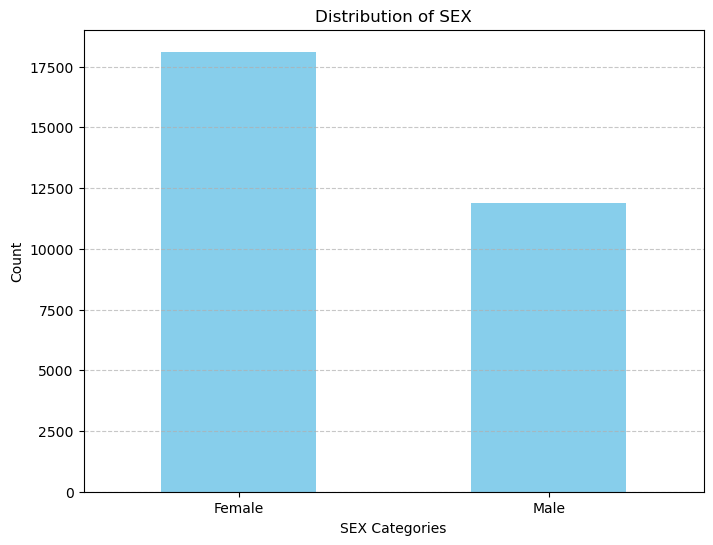

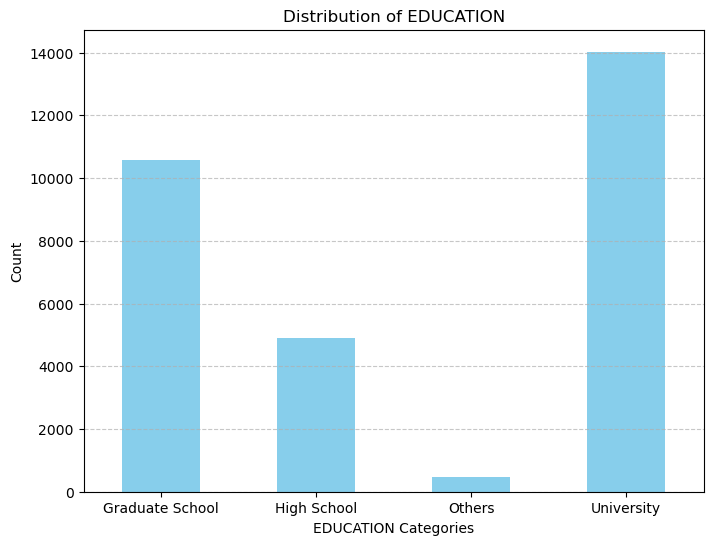

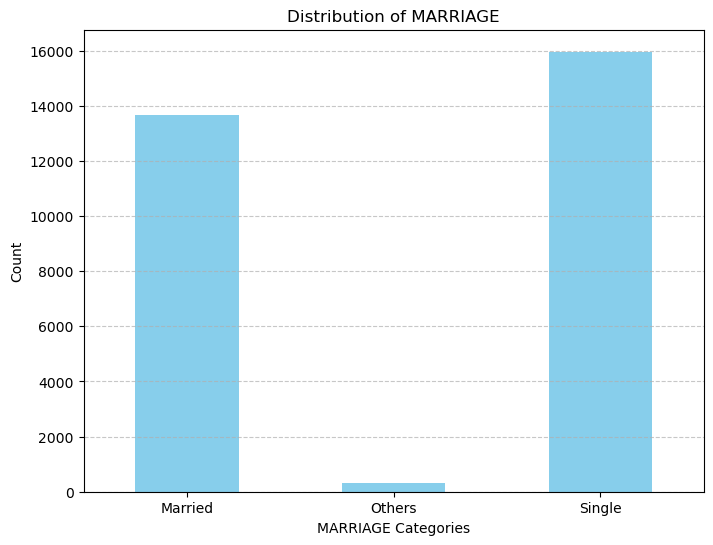

In [10]:

custom_labels = {
    'SEX': {1: 'Male', 2: 'Female'},
    'EDUCATION': {1: 'Graduate School', 2: 'University', 3: 'High School', 4: 'Others'},
    'MARRIAGE': {1: 'Married', 2: 'Single', 3: 'Others'}
}

df['EDUCATION'] = df['EDUCATION'].replace({0: 4, 5: 4, 6: 4})

for column in custom_labels:
    # Map the custom labels to the column values
    value_counts = df[column].map(custom_labels[column]).value_counts()

    # Create the bar plot
    plt.figure(figsize=(8, 6))
    value_counts.sort_index().plot(kind='bar', color='skyblue')
    plt.title(f"Distribution of {column}")
    plt.xlabel(f"{column} Categories")
    plt.ylabel("Count")
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()



Counting the number of instances in each EDUCATION category.


In [11]:
df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64

Just exploring where PAY_1 is 0 in an attepmpt to determine what this value means

In [12]:

df[df['PAY_1'] == 0]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29990,29991,140000,1,2,1,41,0,0,0,0,...,138262,49675,46121,6000,7000,4228,1505,2000,2000,0
29992,29993,10000,1,3,1,43,0,0,0,-2,...,0,0,0,2000,0,0,0,0,0,0
29993,29994,100000,1,1,2,38,0,-1,-1,0,...,70626,69473,55004,2000,111784,4000,3000,2000,2000,0
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0


Defining custom labels for EDUCATION and creating pie chart to explore proportion of Education levels.

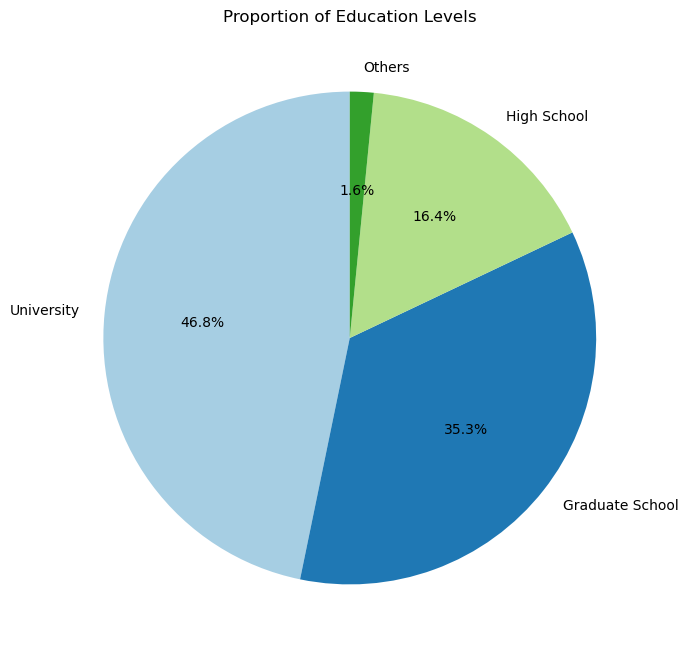

In [13]:
# Define custom labels for EDUCATION
education_labels = {1: 'Graduate School', 2: 'University', 3: 'High School', 4: 'Others', 5: 'Others', 6: 'Others', 0: 'Others'}
education_counts = df['EDUCATION'].map(education_labels).value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
education_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title("Proportion of Education Levels")
plt.ylabel("")  # Removes default y-label
plt.show()

## Reviewing distribution of numerical features in FacetGrid

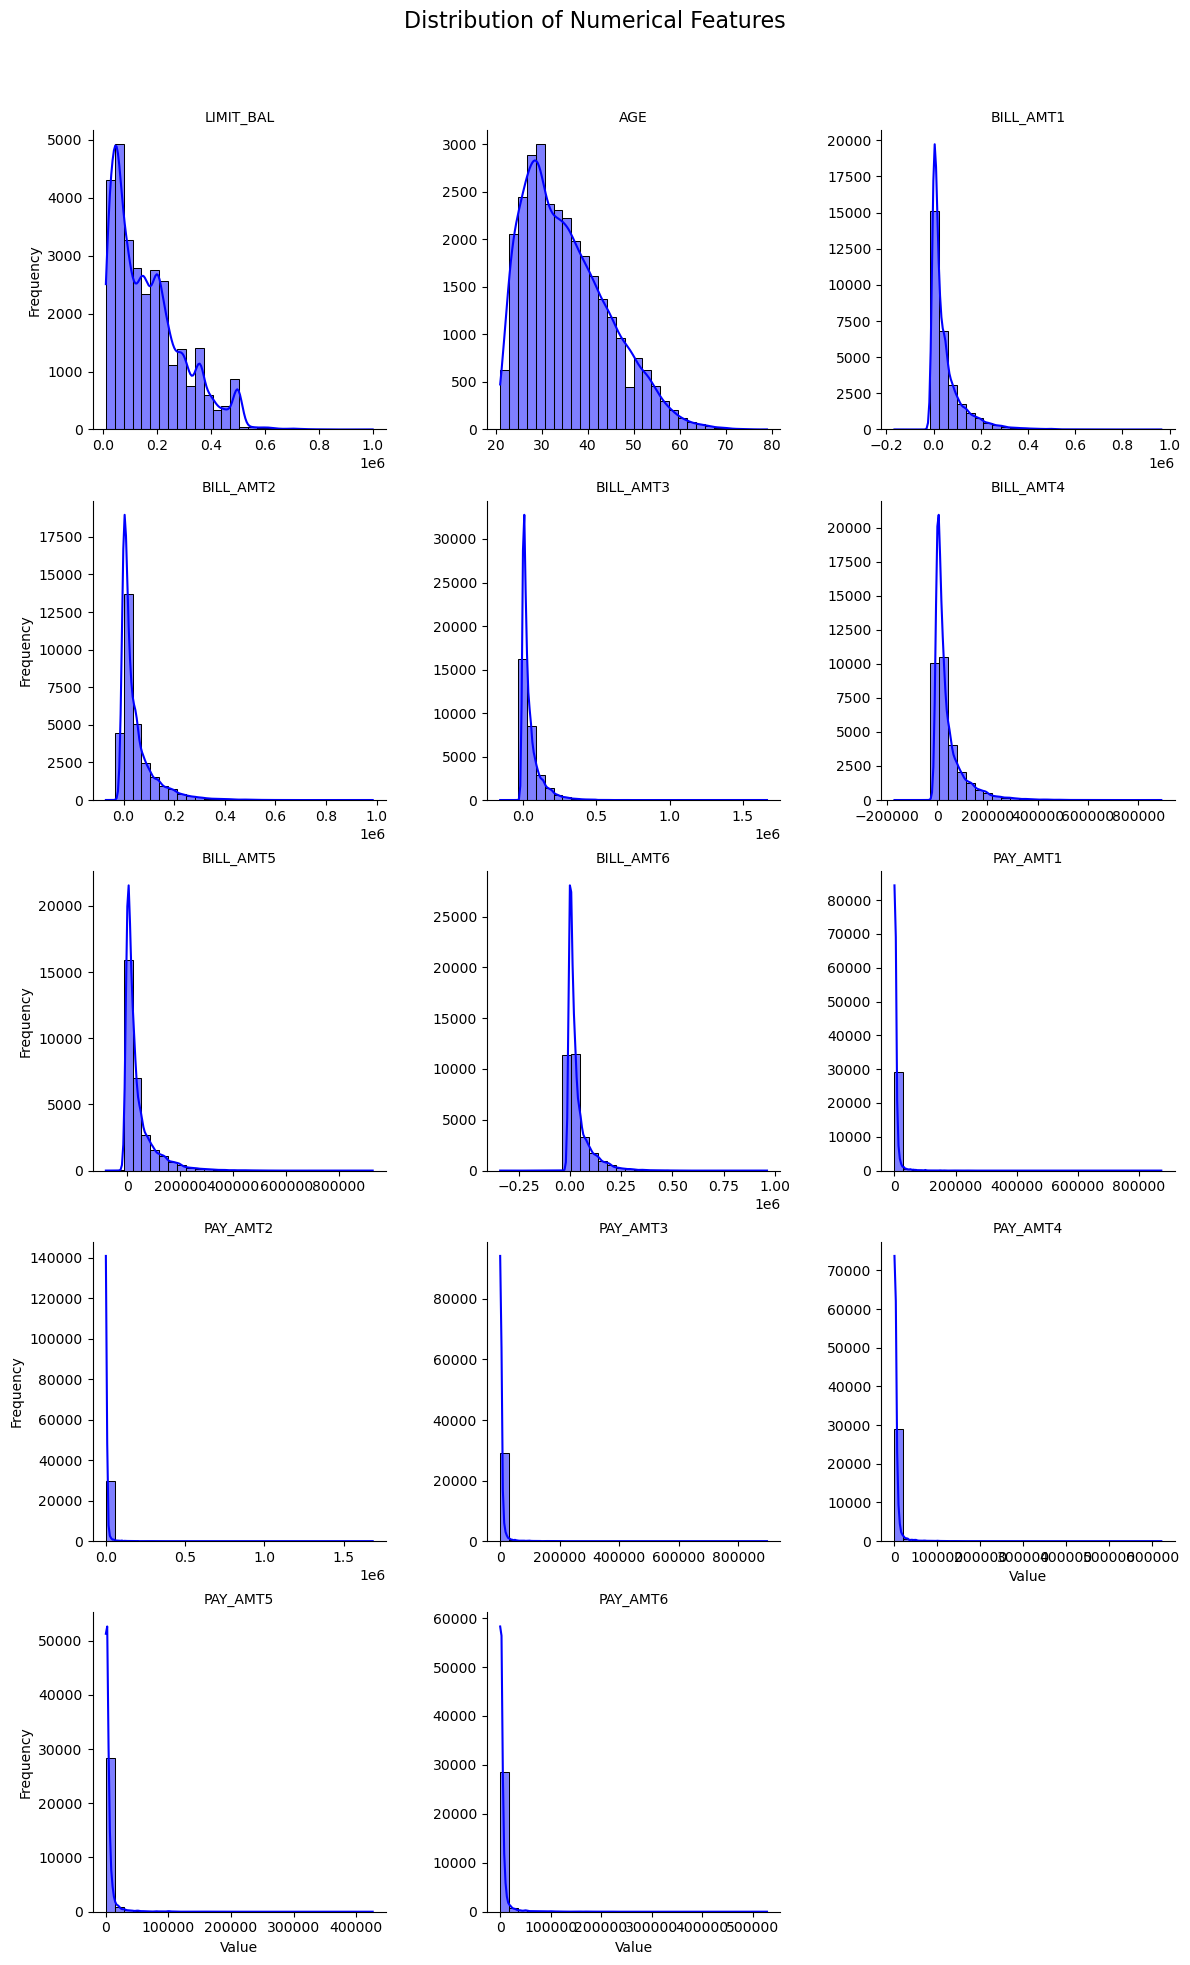

In [20]:
# Select numerical columns
numerical_columns = ['LIMIT_BAL', 'AGE'] + [f'BILL_AMT{i}' for i in range(1, 7)] + [f'PAY_AMT{i}' for i in range(1, 7)]

# Melt the data for numerical columns - going from wide format to long will make it easier to plot.
numerical_data = df[numerical_columns]
melted_data = numerical_data.melt(var_name='Feature', value_name='Value')

# Create the FacetGrid
g = sns.FacetGrid(melted_data, col='Feature', col_wrap=3, height=4, sharex=False, sharey=False)
g.map(sns.histplot, 'Value', kde=True, color='blue', bins=30)

# Add titles and adjust layout
g.set_titles("{col_name}")
g.set_axis_labels("Value", "Frequency")
g.figure.subplots_adjust(top=0.92)
g.figure.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()